<a href="https://colab.research.google.com/github/Thavatharani06/231801180_PODS/blob/main/Ex6(A)_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv.zip')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.info()
df.isnull().sum()
df.describe()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [12]:
content_type_distribution = df['type'].value_counts()
content_type_distribution


,count
type,
Movie,6131
TV Show,2676


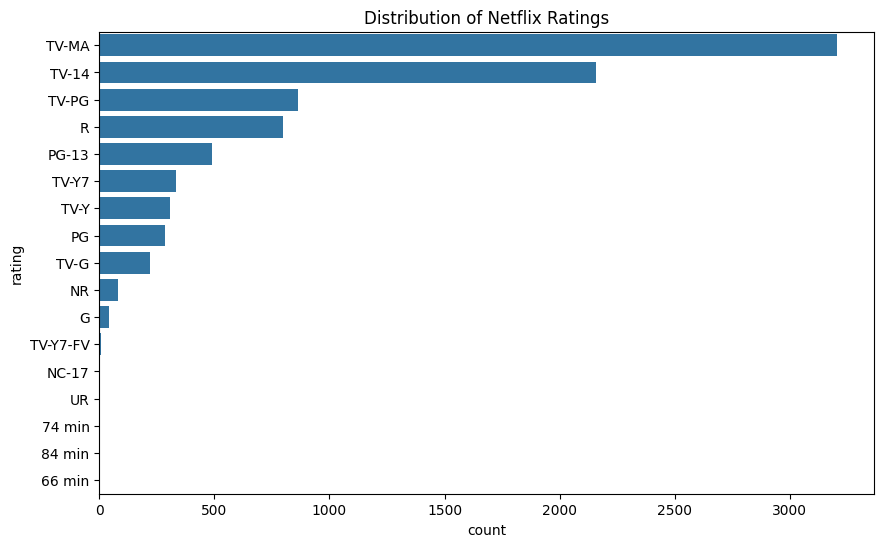

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

rating_distribution = df['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, order=rating_distribution.index)
plt.title('Distribution of Netflix Ratings')
plt.show()


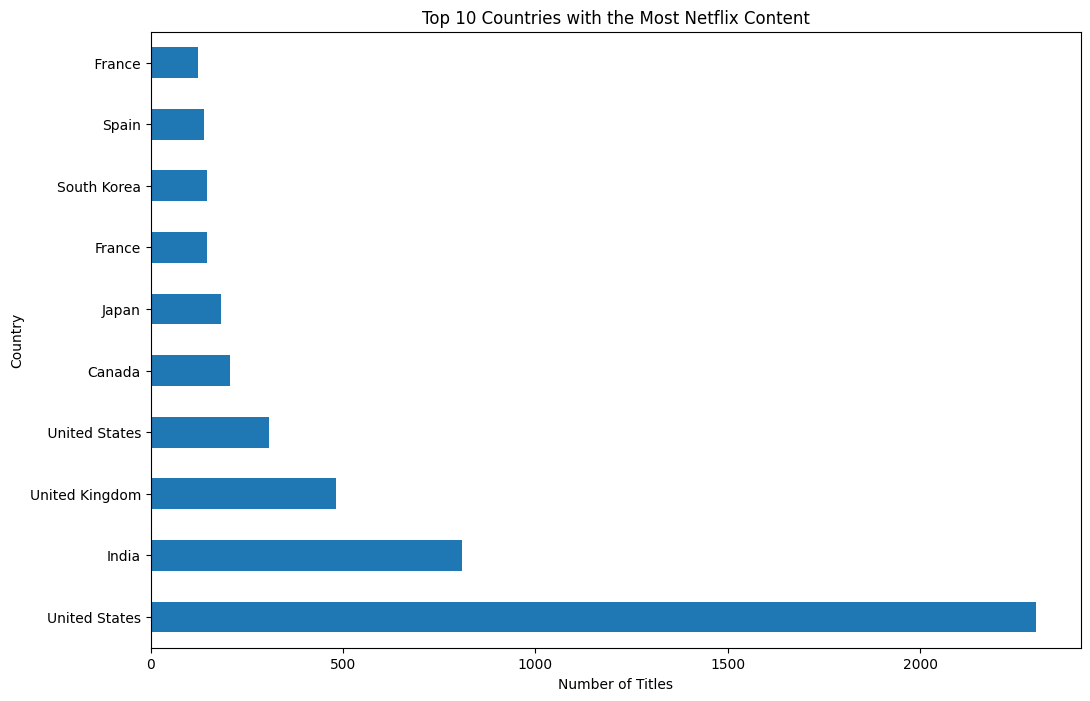

In [ ]:
country_distribution = df['country'].str.split(',').explode().value_counts()

country_distribution.head(10).plot(kind='barh', figsize=(12, 8))
plt.title('Top 10 Countries with the Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


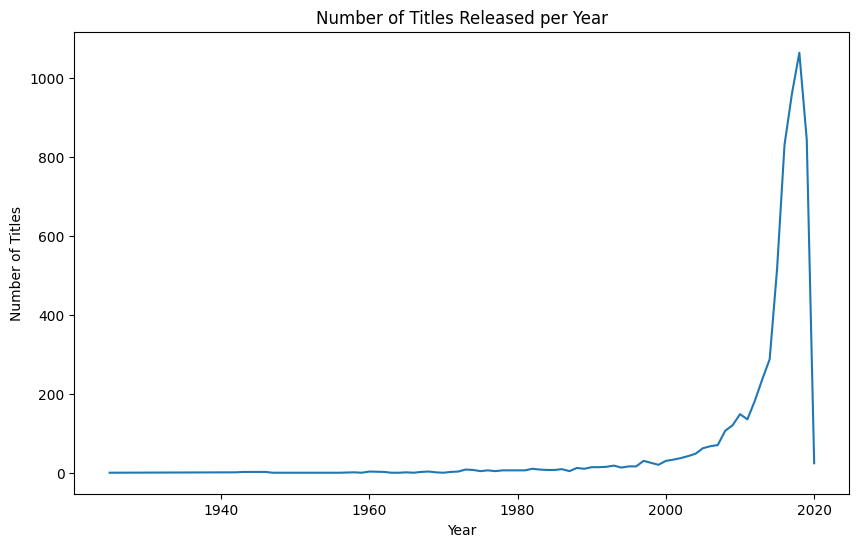

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Number of Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


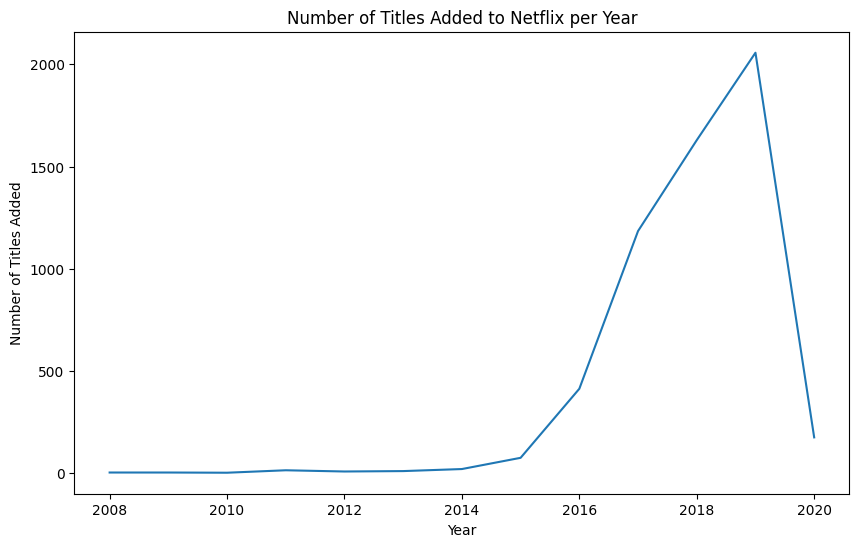

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year

df['added_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Number of Titles Added to Netflix per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()


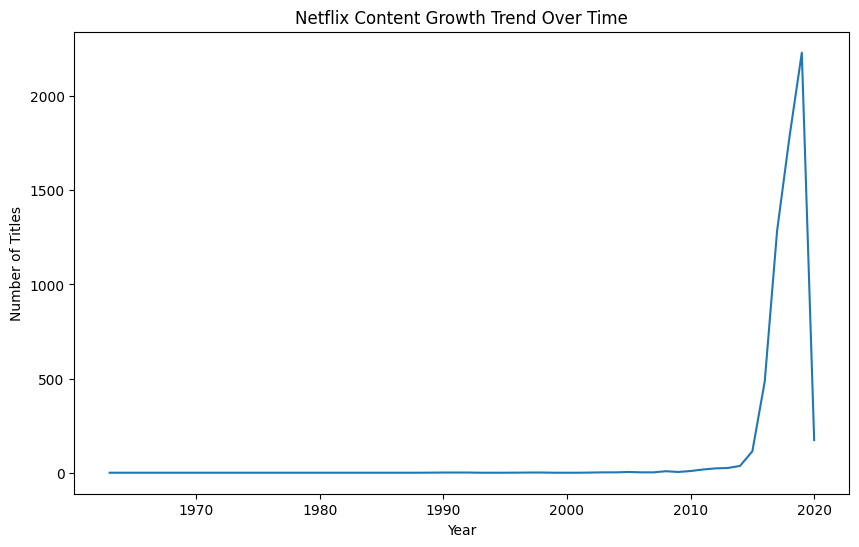

In [ ]:
df['release_added_year'] = df['added_year'].fillna(df['release_year'])
df['release_added_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Netflix Content Growth Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


/tmp/ipython-input-1490271758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)


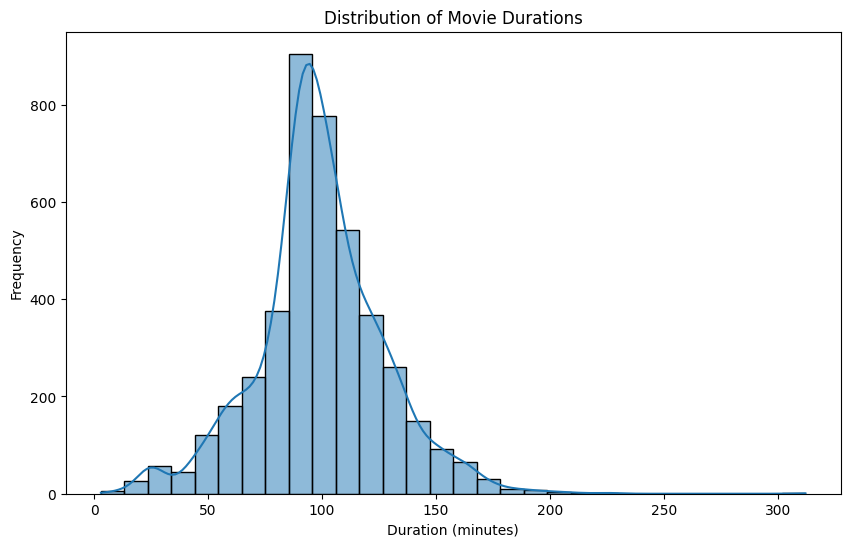

In [ ]:
movies = df[df['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(movies['duration'], kde=True, bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1991416274.py:2: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
/tmp/ipython-input-1991416274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


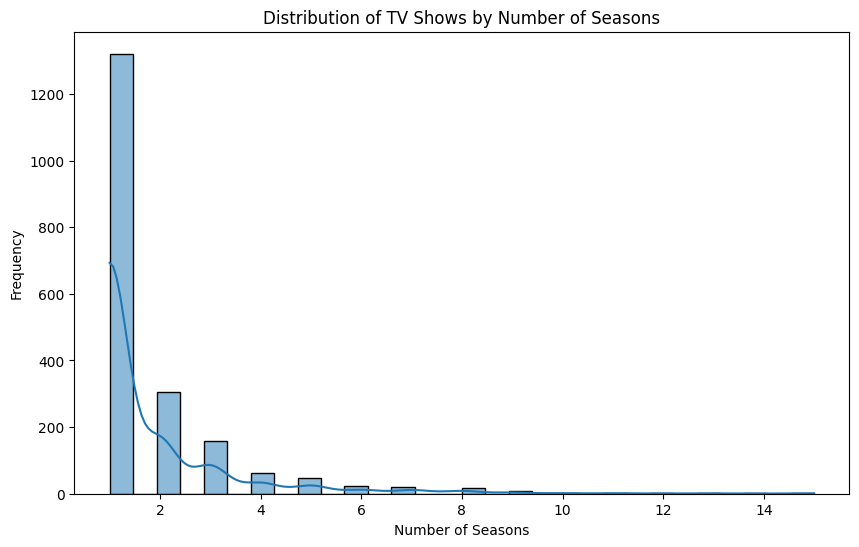

In [ ]:
tv_shows = df[df['type'] == 'TV Show']
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(tv_shows['seasons'], kde=True, bins=30)
plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()


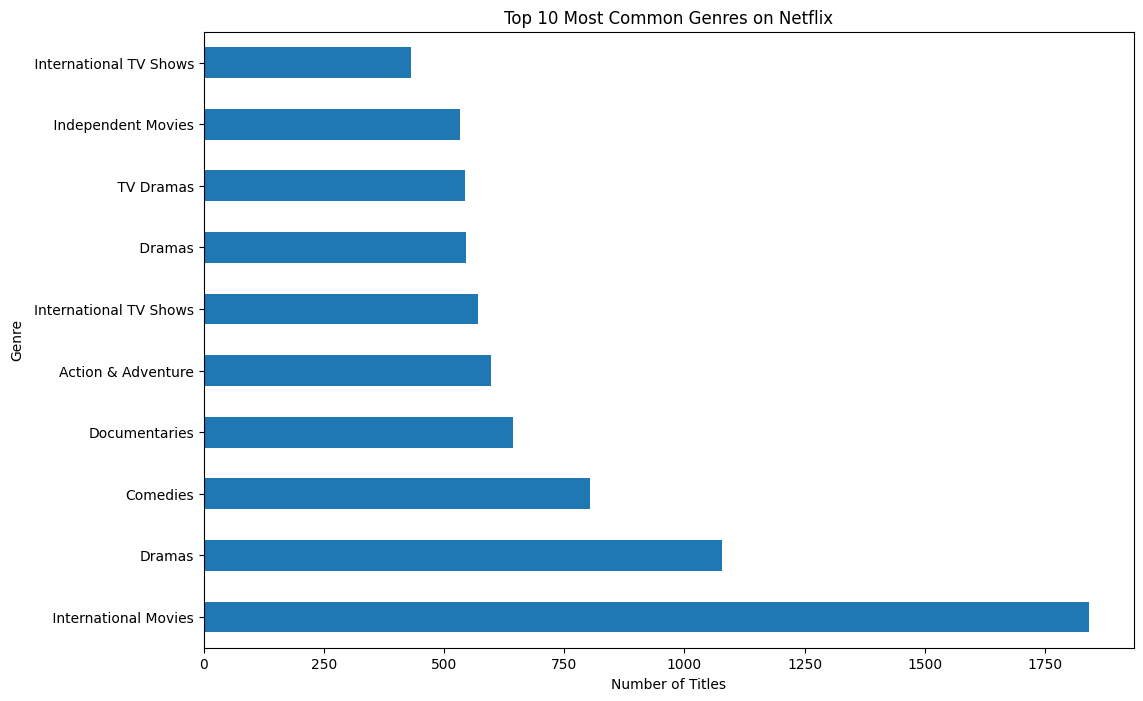

In [ ]:
genres = df['listed_in'].str.split(',').explode().value_counts()

genres.head(10).plot(kind='barh', figsize=(12, 8))
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


In [ ]:
directors = df['director'].str.split(',').explode().value_counts()

directors.head(10)


,count
director,
Raúl Campos,18
Jan Suter,18
Marcus Raboy,14
Jay Karas,14
Jay Chapman,12
Martin Scorsese,9
Steven Spielberg,9
Shannon Hartman,8
Johnnie To,8


In [ ]:
actors = df['cast'].str.split(',').explode().value_counts()

actors.head(10)


,count
cast,
Anupam Kher,30
Om Puri,25
Takahiro Sakurai,24
Shah Rukh Khan,24
Boman Irani,23
Andrea Libman,22
Paresh Rawal,22
Yuki Kaji,22
Akshay Kumar,19


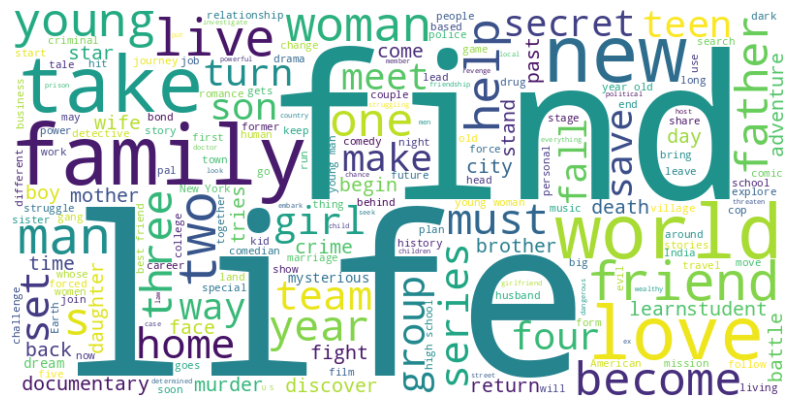

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


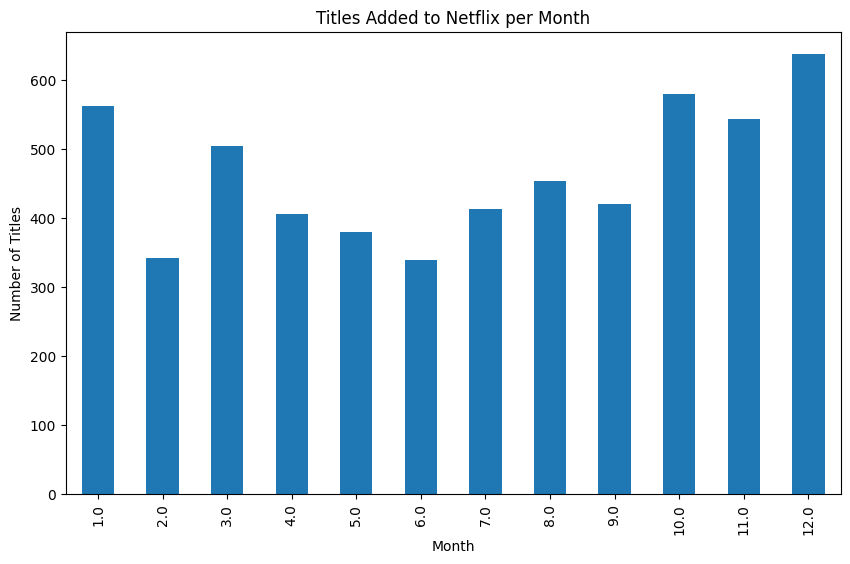

In [ ]:
df['month_added'] = df['date_added'].dt.month

df['month_added'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Titles Added to Netflix per Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()


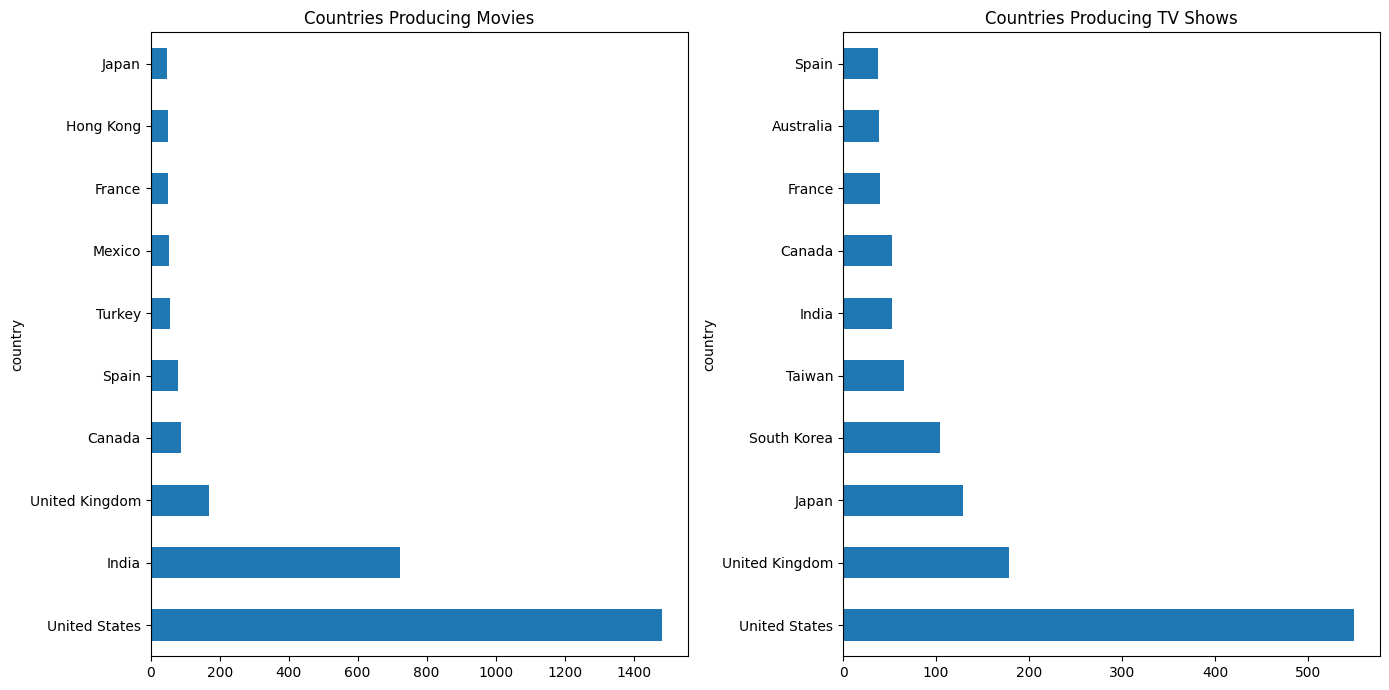

In [ ]:
df['country'] = df['country'].str.split(',')

movie_countries = movies['country'].explode().value_counts()
tv_show_countries = tv_shows['country'].explode().value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

movie_countries.head(10).plot(kind='barh', ax=ax[0], title='Countries Producing Movies')
tv_show_countries.head(10).plot(kind='barh', ax=ax[1], title='Countries Producing TV Shows')

plt.tight_layout()
plt.show()


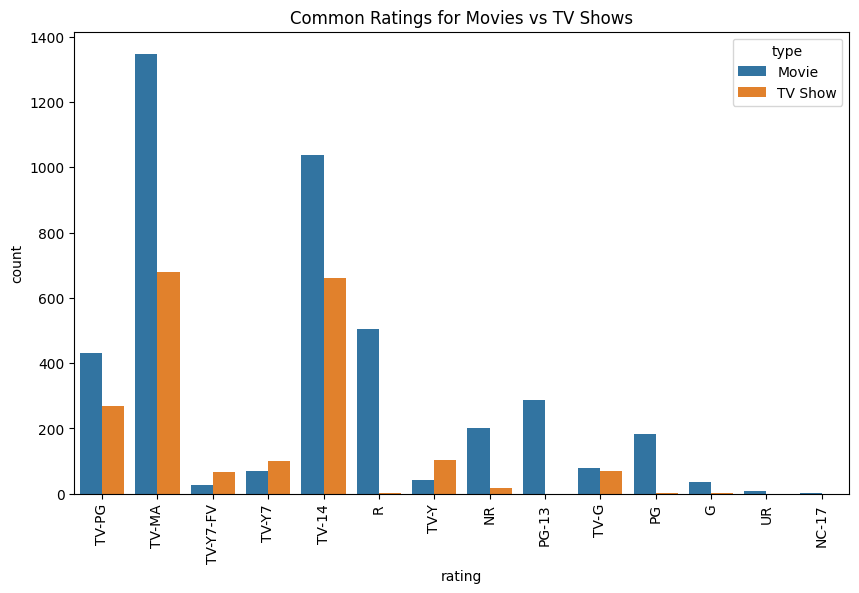

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='type', data=df)
plt.title('Common Ratings for Movies vs TV Shows')
plt.xticks(rotation=90)
plt.show()


In [ ]:
oldest_title = df.loc[df['release_year'].idxmin()]
newest_title = df.loc[df['release_year'].idxmax()]

oldest_title[['title', 'release_year']], newest_title[['title', 'release_year']]


(title           Pioneers: First Women Filmmakers*
 release_year                                 1925
 Name: 4292, dtype: object,
 title           Maradona in Mexico
 release_year                  2020
 Name: 1315, dtype: object)

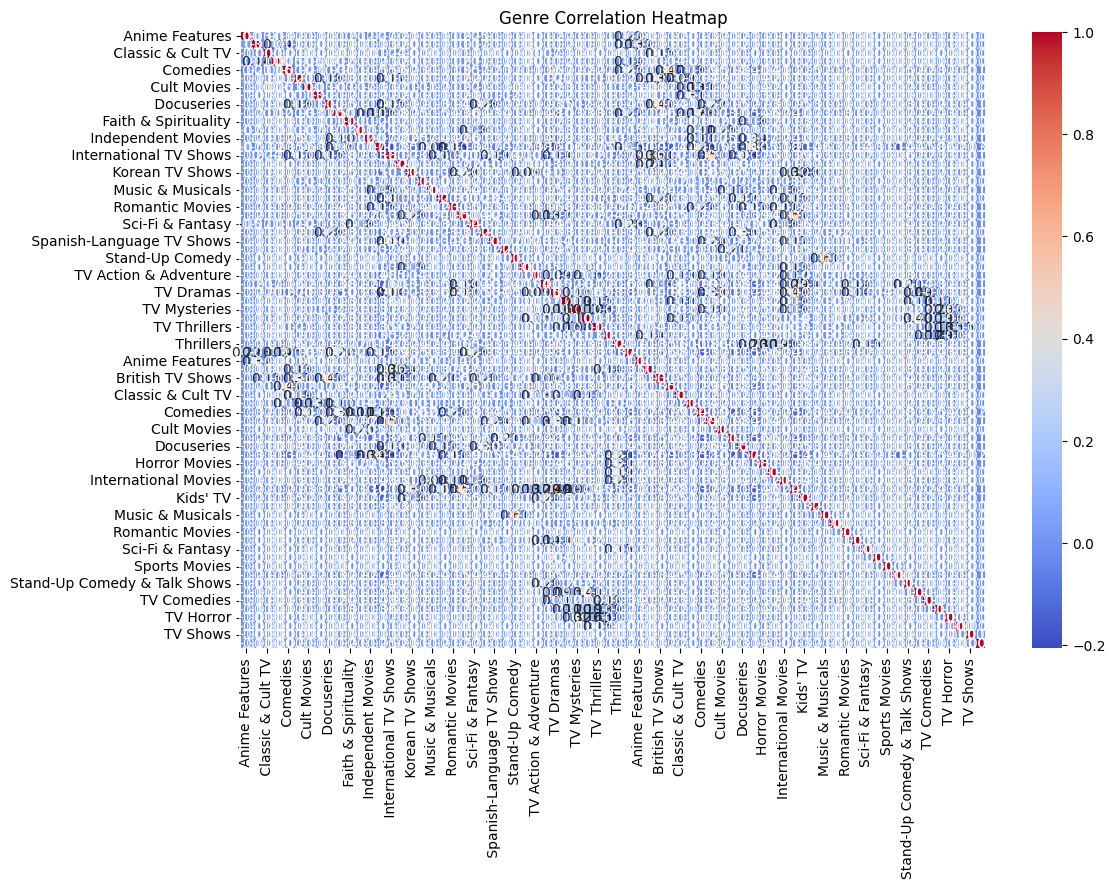

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

mlb = MultiLabelBinarizer()
genres_bin = mlb.fit_transform(df['listed_in'].str.split(','))
genres_df = pd.DataFrame(genres_bin, columns=mlb.classes_)

corr_matrix = genres_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Genre Correlation Heatmap')
plt.show()
